# Проект e-commerce: вариант 1 

Начало решения задач находится чуть дальше после нескольких пустых подряд идущих ячеек.

In [113]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from urllib.parse import urlencode
from datetime import timedelta

In [2]:
# заранее установим удобные для нас параметры графиков: шрифт, стиль, размер

sns.set(
    font_scale =2,
    style      ='whitegrid',
    rc         ={'figure.figsize': (20, 7)}
)

In [3]:
# импортируем данные по ссылкам из Яндекс Диска

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

In [4]:
# ссылка на таблицу с уникальными идентификаторами пользователей

public_key = 'https://yadi.sk/d/FUi5uSd6BfG_ig'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [5]:
customers_data = pd.read_csv(download_url)

In [6]:
# таблица с уникальными идентификаторами пользователей

customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
# посмотрим на размерность

customers_data.shape

(99441, 5)

In [8]:
# посмотрим на типы данных в таблице

customers_data.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [9]:
# ссылка на таблицу заказов

public_key_2 = 'https://yadi.sk/d/t9Li4JOfgxuUrg'
final_url_2 = base_url + urlencode(dict(public_key=public_key_2))
response_2 = requests.get(final_url_2)
download_url_2 = response_2.json()['href']

In [10]:
orders_data = pd.read_csv(download_url_2)

In [11]:
# таблица заказов

orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
# размерность таблицы

orders_data.shape

(99441, 8)

In [13]:
# Переведём колонки со временем в нормальный формат datetime

orders_data[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', \
             'order_estimated_delivery_date']] = \
orders_data[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', \
             'order_estimated_delivery_date']].apply(pd.to_datetime)

In [14]:
# Проверяем. Всё ОК

orders_data.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [15]:
# ссылка на товарные позиции, входящие в заказы

public_key_3 = 'https://yadi.sk/d/Gbt-yAcQrOe3Pw'
final_url_3 = base_url + urlencode(dict(public_key=public_key_3))
response_3 = requests.get(final_url_3)
download_url_3 = response_3.json()['href']

In [16]:
order_items = pd.read_csv(download_url_3)

In [17]:
# таблица с товарными позициями, входящими в заказы

order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
# переведём колонку в формат datetime

order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [19]:
# смотрим на размерность этой таблицы

order_items.shape

(112650, 7)

In [20]:
# смотрим на типы данных

order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [21]:
# объединим таблицу с уникальными айди пользователей с инфой по заказам, оставив все строки с заказами, прикрепив к ним
# уникальные айди пользователей (customer_unique_id) и инфу по пользователям

customers_orders = orders_data.merge(customers_data, how='left', on='customer_id')

In [22]:
# количество заказов осталось прежним

customers_orders.shape

(99441, 12)

In [23]:
# посмотрим, что получилось в результате объединения таблиц

customers_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [24]:
# На всякий случай проверим, не встречаются ли в таблице дубликаты

customers_orders.shape == customers_orders.drop_duplicates().shape

# Всё в порядке (99441, 12)

True

# Решение

Что считается покупкой? Будем считать, что после создания заказа (статус created) покупатель пока не оплатил заказ, а только собрал в корзину товары и оформляет заказ, вводя свои данные, в т.ч. банковские.
Статус invoiced присваевается заказу, только когда человек нажал кнопку "оформить заказ" и ему в какой-либо форме предлагается оплатить заказ, с этого момента товары резервируются в магазине, скажем, на 20 минут (их никто не может купить), и в течение этого времени человек должен оплатить заказ.
После оплаты товара заказу присваевается статус "approved". И вот этот момент я бы считал уже именно одной покупкой.
Я не стал рассматривать как одну покупку один приобретённый товар, т.к. в моём понимании сделать покупку в магазине 2 раза - это прийти туда дважды, а не купить два товара за раз.
Таким образом, отбираем заказы, у которых один из следующих статусов: "delivered", "shipped", "processing" и "approved", поскольку все они по смыслу идут после именно оплаты заказа.
В расчёт, конечно, не идут заказы со статусом "unavailable" (какие-то недоступные из-за технической ошибки, скажем) или "canceled" (отменённые).

In [25]:
# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

# Группируем данные по уникальному айди пользователя (чуть ранее я объединил таблицы по пользователям и заказам)
# и считаем количество заказов на каждого.
# Оставляем только те, у которых количество заказов равно 1.

customers_orders \
    .query("order_status == 'delivered' \
         or order_status == 'shipped' \
         or order_status == 'processing' \
         or order_status == 'approved'") \
    .groupby('customer_unique_id') \
    .agg({'order_id': 'count'}) \
    .query('order_id == 1') \
    .shape[0]

91816

In [26]:
# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

# Оставим только интересующие нас по статусу заказы и те, у которых нет даты доставки

undelivered_orders = orders_data \
    .query("(order_status == 'canceled' \
          or order_status == 'unavailable') \
         and order_delivered_customer_date.isna()")

In [27]:
# Посмотрим, сколько таких заказов

undelivered_orders.shape[0]

1228

In [28]:
# Проверим количество пропущенных значений

undelivered_orders.isna().sum()

# Работать буду по колонке order_purchase_timestamp - времени создания заказа, более того, в нём нет пропущенных значений

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 141
order_delivered_carrier_date     1159
order_delivered_customer_date    1228
order_estimated_delivery_date       0
dtype: int64

In [29]:
# установим колонку order_purchase_timestamp в качестве индекса

undelivered_orders = undelivered_orders.set_index('order_purchase_timestamp')

In [30]:
# проверяем. Всё ОК

undelivered_orders.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2017-11-16 15:09:28,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:26:57,NaT,NaT,2017-12-05
2018-08-04 14:29:27,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-07 04:10:26,NaT,NaT,2018-08-14
2018-01-31 11:31:37,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 14:23:50,NaT,NaT,2018-02-16
2018-01-26 21:34:08,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
2017-08-14 17:38:02,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-17 00:15:18,NaT,NaT,2017-09-05


In [31]:
# сгруппируем недоставленные заказы по статусу (unavailable или canceled) и месяцу
# посчитаем количество заказов на каждый месяц

undev_orders_by_date = undelivered_orders \
    .groupby('order_status') \
    .resample(rule='M') \
    .agg({'order_id': 'count'}) \
    .reset_index() \
    .sort_values('order_status') \
    .sort_values('order_purchase_timestamp')

In [32]:
# Проверяем. Всё ОК

undev_orders_by_date.head()

,order_status,order_purchase_timestamp,order_id
0,canceled,2016-09-30,2
26,unavailable,2016-10-31,7
1,canceled,2016-10-31,19
2,canceled,2016-11-30,0
27,unavailable,2016-11-30,0


In [33]:
# Посчитаем среднее количество выбранных заказов в месяц по их статусу

mean_undev_orders_by_month = undev_orders_by_date \
    .groupby('order_status') \
    .agg({'order_id': 'mean'}) \
    .rename(columns={'order_id': 'mean_number_undev_orders'}) \
    .reset_index()

In [34]:
# ответ на вопрос

mean_undev_orders_by_month

,order_status,mean_number_undev_orders
0,canceled,23.807692
1,unavailable,26.478261


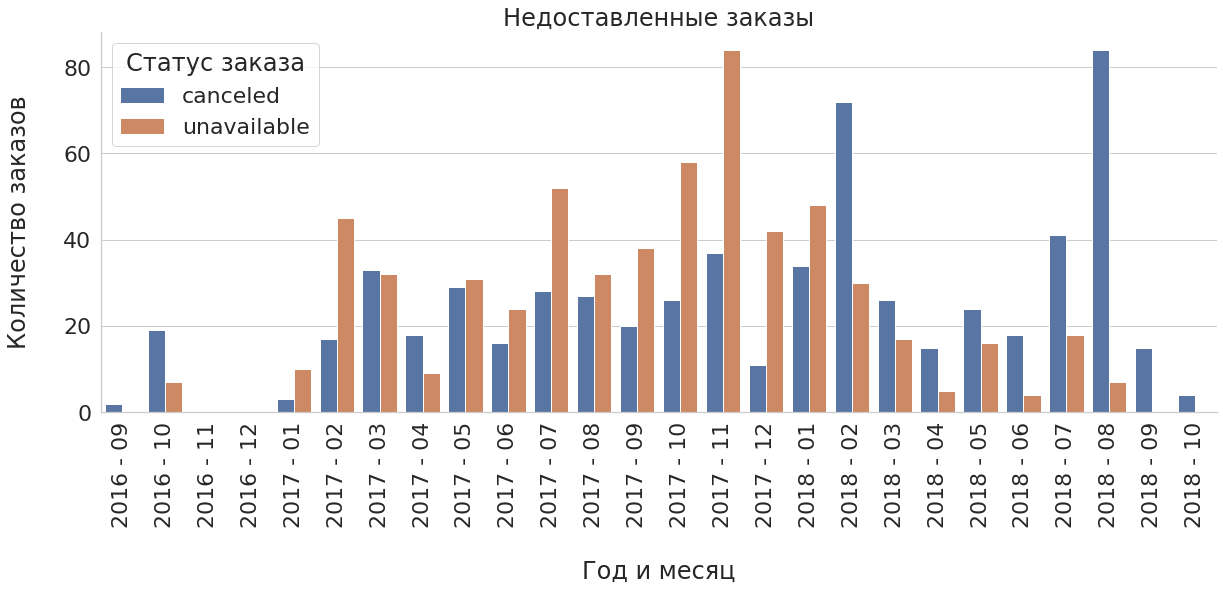

In [35]:
# для наглядности распределение по месяцам - ради интереса

ax = sns.barplot(x='order_purchase_timestamp', y='order_id', hue='order_status', data=undev_orders_by_date)
x_dates = pd.Series(undev_orders_by_date['order_purchase_timestamp'].unique()).dt.strftime('%Y - %m')
ax.set_title('Недоставленные заказы')
ax.set_xticklabels(labels=x_dates, rotation=90)
ax.set(xlabel = '\nГод и месяц', ylabel='Количество заказов\n')
ax.legend(title='Статус заказа')
sns.despine()

In [36]:
# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

# Соединим следующие таблицы: "таблица заказов" и "товарные позиции, входящие в заказы"

products_orders = order_items[['order_id', 'product_id', ]].merge(orders_data[['order_id', 'order_status', 'order_purchase_timestamp']], \
                                                                 how='left', \
                                                                 on='order_id')
products_orders.head()

,order_id,product_id,order_status,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,delivered,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,delivered,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,delivered,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,delivered,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,delivered,2017-02-04 13:57:51


In [37]:
# посмотрим размерность таблицы (ничего не потерялось, судя по строкам)

products_orders.shape[0] == order_items.shape[0]

# (112650, 4)

True

In [38]:
# типы данных

products_orders.dtypes

order_id                            object
product_id                          object
order_status                        object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [39]:
# создадим новую колонку с днём недели для каждого товара

products_orders['weekday'] = products_orders['order_purchase_timestamp'].dt.day_name()

In [40]:
# проверяем таблицу

products_orders.head()

,order_id,product_id,order_status,order_purchase_timestamp,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,delivered,2017-09-13 08:59:02,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,delivered,2017-04-26 10:53:06,Wednesday
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,delivered,2018-01-14 14:33:31,Sunday
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,delivered,2018-08-08 10:00:35,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,delivered,2017-02-04 13:57:51,Saturday


In [41]:
# Как и в первом задании, оставляем только заказы с нужными статусами, unavailable и canceled не считаем.
# С помощью группировки считаем кол-во покупок каждого товара по дням недели.
# И отбираем максимальные значения в колонке number_of_purchases.

products_by_date = products_orders \
    .query("order_status == 'delivered' \
         or order_status == 'shipped' \
         or order_status == 'processing' \
         or order_status == 'approved'") \
    .groupby(['product_id', 'weekday']) \
    .agg({'product_id': 'count'}) \
    .rename(columns={'product_id': 'number_of_purchases'}) \
    .sort_values('number_of_purchases', ascending=False) \
    .groupby('product_id') \
    .head(1) \
    .reset_index()


# Проверяем, что получилось. Посмотрим на топ-10 по кол-ву покупок

products_by_date.head(10)

,product_id,weekday,number_of_purchases
0,422879e10f46682990de24d770e7f83d,Wednesday,93
1,99a4788cb24856965c36a24e339b6058,Monday,92
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
3,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
4,368c6c730842d78016ad823897a372db,Friday,67
5,389d119b48cf3043d311335e499d9c6b,Thursday,67
6,53759a2ecddad2bb87a079a1f1519f73,Wednesday,66
7,d1c427060a0f73f6b889a5c7c61f2ac4,Monday,64
8,3dd2a17168ec895c781a9191c1e95ad7,Wednesday,54
9,a62e25e09e05e6faf31d90c6ec1aa3d1,Thursday,49


In [42]:
# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?
# Не стоит забывать, что внутри месяца может быть не целое количество недель.
# Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

# Несмотря на схожесть формулировки данного вопроса с первым (имею в виду понятие покупки), есть некоторое различие.
# В первом вопрос под покупкой подразумевался, по моему мнению, именно один заказ (order_id), здесь же одна покупка -
# это одна позиция (product_id). Я бы это обосновал тонкостями великого и могучего русского языка.

In [43]:
# удалим ненужные колонки

temp_df = customers_orders.drop(columns=['customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_estimated_delivery_date',
                               'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_purchase_timestamp', 
                               'customer_id'])

temp_df.head()

,order_id,order_status,order_approved_at,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6


In [44]:
# соединим информацию о товарах с информацией о клиентах и времени заказов

customers_products = \
order_items[['order_id', 'order_item_id', 'product_id', ]].merge(temp_df, how='left', on='order_id')

In [45]:
customers_products.head()

,order_id,order_item_id,product_id,order_status,order_approved_at,customer_unique_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,delivered,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,delivered,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,delivered,2018-01-14 14:48:30,3818d81c6709e39d06b2738a8d3a2474
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,delivered,2018-08-08 10:10:18,af861d436cfc08b2c2ddefd0ba074622
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,delivered,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5


In [46]:
# есть ли пропущенные значения?

customers_products.isna().sum()

order_id               0
order_item_id          0
product_id             0
order_status           0
order_approved_at     15
customer_unique_id     0
dtype: int64

In [47]:
# удалим пропущенные значения и оставим только заказы с нужным статусом

customers_products = customers_products.dropna() \
                                                .query("order_status == 'delivered' \
                                                     or order_status == 'shipped' \
                                                     or order_status == 'processing' \
                                                     or order_status == 'approved'")

In [48]:
# выделим из даты год и месяц для удобства группировки

customers_products['order_approved_at'] = \
                    pd.to_datetime(customers_products['order_approved_at'], format='%Y-%m').dt.strftime('%Y-%m')

In [49]:
# группируем наши покупки по пользователям и месяцам

products_by_month_customer = customers_products \
    .groupby(['customer_unique_id', 'order_approved_at'], as_index=False) \
    .agg({'product_id': 'count'}) \
    .rename(columns={'product_id': 'number_of_purchased_products'})

In [50]:
products_by_month_customer.head()

,customer_unique_id,order_approved_at,number_of_purchased_products
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1


In [51]:
# вычислим количество товаров в неделю, поделив количество товаров в месяц (number_of_purchased_products) на кол-во недель в
# месяце (кол-во дней / 7)

products_by_month_customer['order_approved_at'] = pd.to_datetime(products_by_month_customer['order_approved_at'])

products_by_month_customer['products_per_week'] = (products_by_month_customer['number_of_purchased_products'] / \
                                                  (products_by_month_customer['order_approved_at'].dt.days_in_month / 7)) \
                                                  .round(2)

products_by_month_customer['order_approved_at'] = products_by_month_customer['order_approved_at'].dt.strftime('%Y-%m')

In [52]:
products_by_month_customer.head()

,customer_unique_id,order_approved_at,number_of_purchased_products,products_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,1,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,0.23


In [53]:
# посмотрим для примера на пользователя, который покупал товары в 10 разных месяцах

products_by_month_customer \
    .query("customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455'")

,customer_unique_id,order_approved_at,number_of_purchased_products,products_per_week
53192,8d50f5eadf50201ccdcedfb9e2ac8455,2017-05,1,0.23
53193,8d50f5eadf50201ccdcedfb9e2ac8455,2017-06,1,0.23
53194,8d50f5eadf50201ccdcedfb9e2ac8455,2017-07,2,0.45
53195,8d50f5eadf50201ccdcedfb9e2ac8455,2017-08,1,0.23
53196,8d50f5eadf50201ccdcedfb9e2ac8455,2017-09,1,0.23
53197,8d50f5eadf50201ccdcedfb9e2ac8455,2017-10,2,0.45
53198,8d50f5eadf50201ccdcedfb9e2ac8455,2017-11,1,0.23
53199,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05,2,0.45
53200,8d50f5eadf50201ccdcedfb9e2ac8455,2018-07,2,0.45
53201,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08,3,0.68


In [54]:
# 5. Используя pandas, проведи когортный анализ пользователей.
# В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

# Предлагаю в качестве основы взять уже созданную таблицу customers_orders, где уже есть данные по уникальным айди и
# времени, когда они делали покупки.

In [55]:
# отфильтруем по статусу заказа, удалим строки с отсутствующими значениями (отсутствующие, возможно, по тех. причинам).
# Оставим только строки с айди и датой совершения покупки.

customers_dates = customers_orders \
                            .query("order_status == 'delivered' \
                                 or order_status == 'shipped' \
                                 or order_status == 'processing' \
                                 or order_status == 'approved'") \
                            .dropna()[['customer_unique_id', 'order_approved_at']]

In [56]:
# переведём дату в удобный вид "год-месяц"

customers_dates['order_approved_at'] = customers_dates['order_approved_at'].dt.strftime('%Y-%m')

In [57]:
customers_dates.head()

,customer_unique_id,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02


In [58]:
# Поскольку мы хотим анализировать показатель retention, то в качестве признака формирования когорты возьмём
# первую покупку пользователя

# Размер когорты - месяц

# Отчётный период - "период с января по декабрь". Поскольку у нас есть данные за весь 2017 год и за часть 2016 и 2018 гг.,
# то исследуем retention и в них, чтобы сравнить те же месяца в другие года и сравним показатели.
# Вдруг, у когорты января 2018 retention больше, чем у когорты января 2017.

In [59]:
# Найдём для каждого пользователя год и месяц его самой первой покупки

first_buy = customers_dates \
                .groupby('customer_unique_id') \
                .agg({'order_approved_at': 'min'}) \
                .reset_index() \
                .rename(columns={'order_approved_at': 'first_buy'})

In [60]:
first_buy.head()

,customer_unique_id,first_buy
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11


In [61]:
# Создадим новую таблицу, в которой будет информация о пользователях, датах их покупок и датах первых покупок
# Дата первой покупки появляется без исключения во всех строках, даже если пользователь появлялся в таблице 2, 3 или 100 раз.

df = customers_dates.merge(first_buy, how='left', on='customer_unique_id')

# Переведём в удобный формат для удобства вычисления

df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['first_buy'] = pd.to_datetime(df['first_buy'])

In [62]:
# Вычислим разницу для каждого пользователя между его покупкой и его самой первой покупкой (в месяцах)

df['cohort_lifetime'] = \
12 * (df['order_approved_at'].dt.year - df['first_buy'].dt.year) + (df['order_approved_at'].dt.month - df['first_buy'].dt.month)

In [63]:
df.head()

,customer_unique_id,order_approved_at,first_buy,cohort_lifetime
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,2017-09-01,1
1,af07308b275d755c9edb36a90c618231,2018-07-01,2018-07-01,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01,2018-08-01,0
3,7c142cf63193a1473d2e66489a9ae977,2017-11-01,2017-11-01,0
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-01,2018-02-01,0


In [64]:
# Возвращаемся обратно к краткой записи "год - месяц"

df['order_approved_at'] = df['order_approved_at'].dt.strftime('%Y-%m')
df['first_buy'] = df['first_buy'].dt.strftime('%Y-%m')

In [65]:
df.head()

,customer_unique_id,order_approved_at,first_buy,cohort_lifetime
0,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09,1
1,af07308b275d755c9edb36a90c618231,2018-07,2018-07,0
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08,0
3,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11,0
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02,0


In [66]:
# Используя pivot_table, мы получаем таблицу, в которой есть информация о наших когортах: их названия (first_buy)
# и количество уникальных пользователей (customer_unique_id) в определённый промежуток времени (cohort_lifetime)

cohorts = df.pivot_table(index=['first_buy', 'cohort_lifetime'],
                         aggfunc={'customer_unique_id': 'nunique'}) \
            .reset_index()

In [67]:
cohorts.head(10)

,first_buy,cohort_lifetime,customer_unique_id
0,2016-09,0,1
1,2016-10,0,262
2,2016-10,6,1
3,2016-10,9,1
4,2016-10,11,1
5,2016-10,13,1
6,2016-10,15,1
7,2016-10,17,1
8,2016-10,19,2
9,2016-10,20,2


In [68]:
# Теперь нужно посчитать количество пользователей по когортам (то есть по дате их первой покупки)

initial_users_count = cohorts.query("cohort_lifetime == 0")

In [69]:
# Оставим две колонки

initial_users_count = initial_users_count[['first_buy', 'customer_unique_id']]

In [70]:
# Переименуем для удобства
# first_buy - название когорты
# cohort_users - количество пользователей в этой когорте

initial_users_count = initial_users_count.rename(columns={'customer_unique_id': 'cohort_users'})

In [71]:
initial_users_count

,first_buy,cohort_users
0,2016-09,1
1,2016-10,262
10,2016-12,1
12,2017-01,683
30,2017-02,1612
48,2017-03,2511
66,2017-04,2232
83,2017-05,3452
99,2017-06,3044
114,2017-07,3709


In [72]:
# Добавим информацию о размере когорты в нашу таблицу cohorts

cohorts = cohorts.merge(initial_users_count, on='first_buy')

In [73]:
# Вычислим retention, поделив количество оставшихся юзеров в определённый месяц на количество всех юзеров,
# совершивших первую покупку в определённый месяц

cohorts['retention'] = cohorts['customer_unique_id'] / cohorts['cohort_users']

In [74]:
cohorts.head()

,first_buy,cohort_lifetime,customer_unique_id,cohort_users,retention
0,2016-09,0,1,1,1.000000
1,2016-10,0,262,262,1.000000
2,2016-10,6,1,262,0.003817
3,2016-10,9,1,262,0.003817
4,2016-10,11,1,262,0.003817


In [75]:
# "Развернём" таблицу: индексами станут названия когорт, колонками - месяцы, значения - retention rate

retention_pivot = cohorts.pivot_table(index   ='first_buy',
                                      columns ='cohort_lifetime',
                                      values  ='retention')

In [76]:
retention_pivot

# Значения NaN означают, что в данный промежуток времени не было возможности рассчитать retention, т.к. количество
# юзеров, что-то купивших в этот месяц из этой когорты, равнялось 0.
# Какой-то более-менее нормальный retention можно вычислить только начиная с января 2017 года и до августа 2018, т.к.
# там уже и пользователей намного больше (200 в октябре 2016 года и 600 и более, начиная с января 2017).

# Далее - более презентативная версия данной таблицы.

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_buy,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.007634
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.004392,0.002928,0.001464,0.004392,0.001464,0.004392,0.001464,0.001464,NaN,0.002928,0.002928,0.007321,0.004392,0.001464,0.001464,0.002928,0.004392,0.001464,NaN
2017-02,1.0,0.001861,0.002481,0.001861,0.004342,0.001241,0.002481,0.001861,0.000620,0.001861,0.001241,0.003102,0.001241,0.001861,0.001241,0.000620,0.000620,0.001861,NaN,NaN
2017-03,1.0,0.004381,0.003584,0.003584,0.003584,0.001593,0.001593,0.003186,0.002788,0.001195,0.003584,0.001195,0.001991,0.001195,0.001593,0.002389,0.000796,0.001195,NaN,NaN
2017-04,1.0,0.006272,0.002240,0.001792,0.002240,0.002688,0.003584,0.002688,0.003584,0.001792,0.002240,0.000896,0.000448,0.000448,0.000896,0.000896,0.001344,NaN,NaN,NaN
2017-05,1.0,0.005214,0.004635,0.002897,0.002897,0.003187,0.004056,0.001448,0.002607,0.002607,0.002897,0.003476,0.001738,0.000579,0.001738,0.002028,NaN,NaN,NaN,NaN
2017-06,1.0,0.004928,0.003942,0.004271,0.002957,0.003614,0.003614,0.002300,0.001314,0.001971,0.002957,0.003942,0.001643,0.001643,0.002300,NaN,NaN,NaN,NaN,NaN


In [77]:
ur_style = (retention_pivot.iloc[3:, 0:19]
            .style
            .set_caption('Retention Rate per Cohort')  # добавляем подпись
            .background_gradient(cmap='viridis')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

# Самый высокий retention на 3-й месяц наблюдается у когорты с первой покупкой в июне 2017 года (2017-06).

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
first_buy,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.44%,0.29%,0.15%,0.44%,0.15%,0.44%,0.15%,0.15%,,0.29%,0.29%,0.73%,0.44%,0.15%,0.15%,0.29%,0.44%,0.15%
2017-02,100.00%,0.19%,0.25%,0.19%,0.43%,0.12%,0.25%,0.19%,0.06%,0.19%,0.12%,0.31%,0.12%,0.19%,0.12%,0.06%,0.06%,0.19%,
2017-03,100.00%,0.44%,0.36%,0.36%,0.36%,0.16%,0.16%,0.32%,0.28%,0.12%,0.36%,0.12%,0.20%,0.12%,0.16%,0.24%,0.08%,0.12%,
2017-04,100.00%,0.63%,0.22%,0.18%,0.22%,0.27%,0.36%,0.27%,0.36%,0.18%,0.22%,0.09%,0.04%,0.04%,0.09%,0.09%,0.13%,,
2017-05,100.00%,0.52%,0.46%,0.29%,0.29%,0.32%,0.41%,0.14%,0.26%,0.26%,0.29%,0.35%,0.17%,0.06%,0.17%,0.20%,,,
2017-06,100.00%,0.49%,0.39%,0.43%,0.30%,0.36%,0.36%,0.23%,0.13%,0.20%,0.30%,0.39%,0.16%,0.16%,0.23%,,,,
2017-07,100.00%,0.54%,0.32%,0.19%,0.35%,0.19%,0.32%,0.11%,0.19%,0.24%,0.22%,0.30%,0.13%,0.24%,,,,,
2017-08,100.00%,0.69%,0.37%,0.27%,0.37%,0.51%,0.27%,0.27%,0.12%,0.17%,0.25%,0.17%,0.15%,,,,,,
2017-09,100.00%,0.67%,0.50%,0.32%,0.42%,0.27%,0.22%,0.22%,0.30%,0.17%,0.25%,0.07%,,,,,,,


In [78]:
# 6. RFM-сегментация пользователей

# Как и раньше, одна покупка - один заказ (order_id)

In [79]:
# посчитаем для каждого заказа его стоимость (сумму стоимости всех позиций)

orders_prices = order_items \
    .groupby('order_id') \
    .agg({'price': 'sum'}) \
    .reset_index()

orders_prices.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [80]:
# подготовим таблицу с нашими юзерами и их order_id для слияния с таблицей, которая получилась на предыдущем шаге

customers_dates = customers_orders.query("order_status == 'delivered' \
                     or order_status == 'shipped' \
                     or order_status == 'processing' \
                     or order_status == 'approved'")[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]

customers_dates.head()

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


In [81]:
df = customers_dates.merge(orders_prices, how='left', on='order_id').dropna()

df.head()

,customer_unique_id,order_id,order_purchase_timestamp,price
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90


In [82]:
print('У нас заказы с {} по {}.'.format(df['order_purchase_timestamp'].min(),
                                       df['order_purchase_timestamp'].max()))

У нас заказы с 2016-09-04 21:15:19 по 2018-09-03 09:06:57.


In [83]:
# Представим, что сегодня 4 сентября 2018 года (на 1 день позже самой последней покупки), чтобы удобно было вычислять
# количество дней с момента последней покупки - Recency (смысл анализа от этого не изменится).

today_date = df['order_purchase_timestamp'].max() + timedelta(days=1)

today_date

Timestamp('2018-09-04 09:06:57')

In [84]:
# Один год обычно используется как значение периода в RFM - анилизе. Будем анализировать наших пользователей за последний год,
# то есть начиная с 4 сентября 2017 года.

period = 365

In [85]:
# вычитаем из сегодняшней даты дату покупки

df['days_since_order'] = (today_date - df['order_purchase_timestamp']).dt.days

df.head()

,customer_unique_id,order_id,order_purchase_timestamp,price,days_since_order
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99,336
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70,41
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90,27
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00,289
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90,202


In [86]:
# в новой таблице оставляем для каждого пользователя только его последнюю покупку (минимальная разница - days_since_order).
# Вычисляем, сколько заказов сделал каждый пользователь за последний год.

rfm = df \
    .groupby('customer_unique_id') \
    .agg({'days_since_order': 'min',
          'order_purchase_timestamp': lambda x: len([date for date in x if date >= today_date - timedelta(days=period)]) }) \
    .reset_index()

rfm = rfm.rename(columns={'days_since_order': 'recency', 'order_purchase_timestamp': 'frequency'})
rfm.head()

,customer_unique_id,recency,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1
2,0000f46a3911fa3c0805444483337064,542,0
3,0000f6ccb0745a6a4b88665a16c9f078,326,1
4,0004aac84e0df4da2b147fca70cf8255,293,1


In [87]:
# Вычисляем monetary

rfm = rfm.merge(df.groupby('customer_unique_id').agg({'price': 'sum'}).reset_index(),
          how='left',
          on='customer_unique_id')

rfm = rfm.rename(columns={'price': 'monetary'})
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,0,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [88]:
# оставляем людей с recency менее 365 дней

rfm = rfm.query("recency < 365")
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,154.00


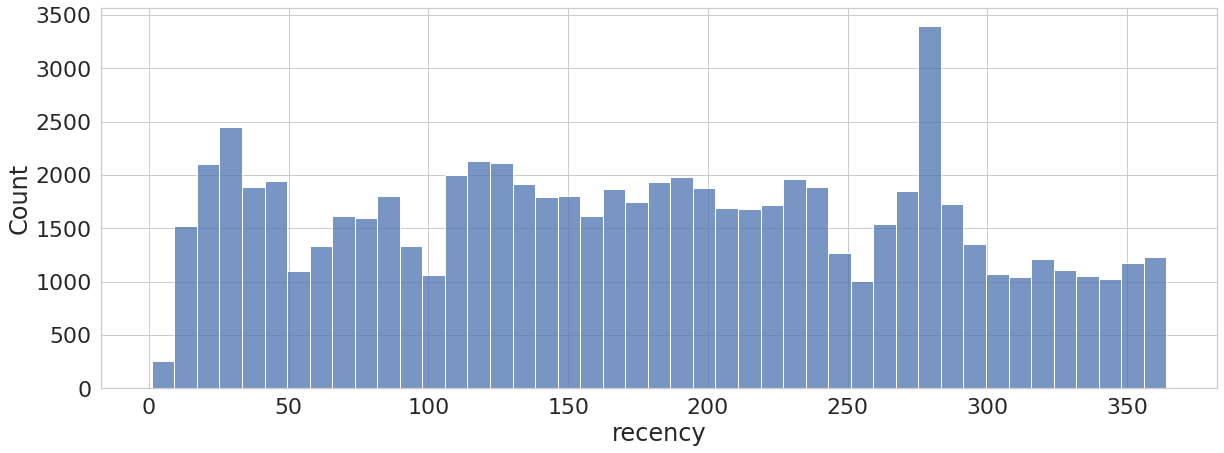

In [89]:
# распределение recency напоминает равномерное, поэтому не буду ничего выдумывать и поделю пользователей так:
# ранг 5: <= 30 дней
# ранг 4: 31 - 60 дней
# ранг 3: 61 - 90 дней
# ранг 2: 91 - 180 дней
# ранг 1: 181 - 365 дней

sns.histplot(rfm.recency)

In [94]:
def r_score(x):
    if x <= 30:
        return 5
    elif x <= 60:
        return 4
    elif x <= 90:
        return 3
    elif x <= 180:
        return 2
    else:
        return 1

In [130]:
rfm['R'] = rfm['recency'].apply(r_score)

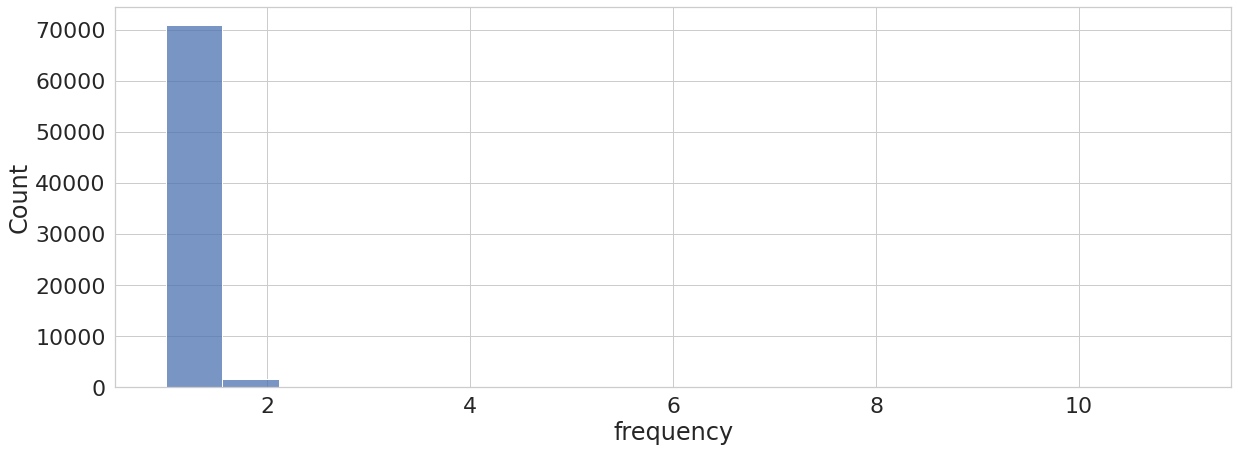

In [127]:
# распределение frequency. Видно, что подавляющее большинство покупателей купили у нас что-то за последний год только один раз.
# Будет только две градации F: 1 - один раз купили, 2 - два и больше раз.

sns.histplot(rfm['frequency'])

In [135]:
def f_score(x):
    if x == 1:
        return 1
    else:
        return 2

In [136]:
rfm['F'] = rfm['frequency'].apply(f_score)

In [142]:
# информация о monetary

rfm.monetary.describe()

count    72760.000000
mean       141.924960
std        212.109239
min          0.850000
25%         48.000000
50%         89.900000
75%        155.000000
max      13440.000000
Name: monetary, dtype: float64

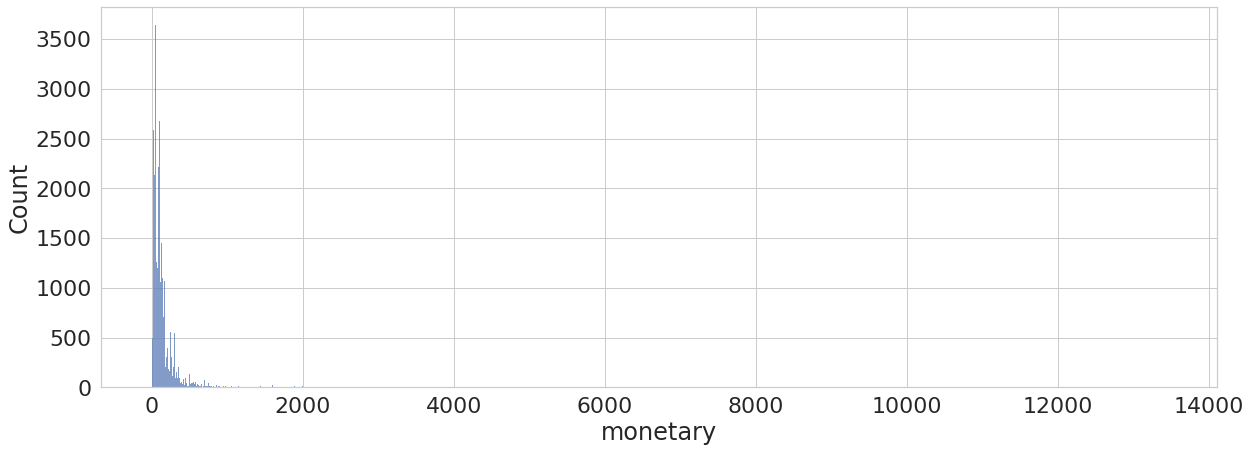

In [143]:
# почти все наши значения сосредоточены в левой части графика. Есть также немного выбросов

sns.histplot(rfm.monetary)

In [147]:
# считаю целесообразным разделить наши наблюдения по квантилям 20, 40, 60 и 80

quantiles = rfm['monetary'].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
quantiles

# У 80% пользователей покупок менее, чем на 179.9 денежных единиц

{0.2: 39.9, 0.4: 69.9, 0.6: 110.0, 0.8: 179.9}

In [148]:
# Сегменты M:
# 1 - monetary <= 39.9
# 2 - 39.9 < monetary <= 69.9
# 3 - 69.9 < monetary <= 110
# 4 - 110 < monetary <= 179.9
# 5 - 179 < monetary

def m_score(x):
    if x <= quantiles[0.2]:
        return 1
    elif x <= quantiles[0.4]:
        return 2
    elif x <= quantiles[0.6]:
        return 3
    elif x <= quantiles[0.8]:
        return 4
    else:
        return 5

In [149]:
rfm['M'] = rfm['monetary'].apply(m_score)

In [158]:
# создадим колонку RFM Score, которая включает в себя показатели R, F и M

rfm['RFM_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [159]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,2,1,4,214
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,2,1,1,211
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,1,5,115
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,154.00,2,1,4,214


In [163]:
# получилось 50 различных RFM - сегментов (5 * 2 * 5).

len(rfm.RFM_score.value_counts())

50

In [ ]:
# Оставлю только 4 сегмента (из-за специфика покупки, т.к. большая часть покупала только 1 раз).

# Золотые клиенты: покупали в этом месяце, неважно сколько раз.
# Лояльные клиенты: покупали что-то два раза или больше, но менее двух месяцев назад, но не более полугода назад.
# Типичные покупатели: покупали что-то один раз, но менее двух месяцев назад, но не более полугода назад.
# Группа риска: покупали что-то более полугода назад.

In [182]:
segt_map = {
    r'5[1-2]': 'золотые клиенты',
    r'[2-4]2': 'лояльные клиенты',
    r'[2-4]1': 'типичные покупатели',
    r'1[1-2]': 'группа риска'
}

In [183]:
rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)

In [213]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,2,1,4,214,типичные покупатели
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,2,1,1,211,типичные покупатели
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,1,1,111,группа риска
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,1,5,115,группа риска
5,0004bd2a26a76fe21f786e4fbd80607f,151,1,154.00,2,1,4,214,типичные покупатели


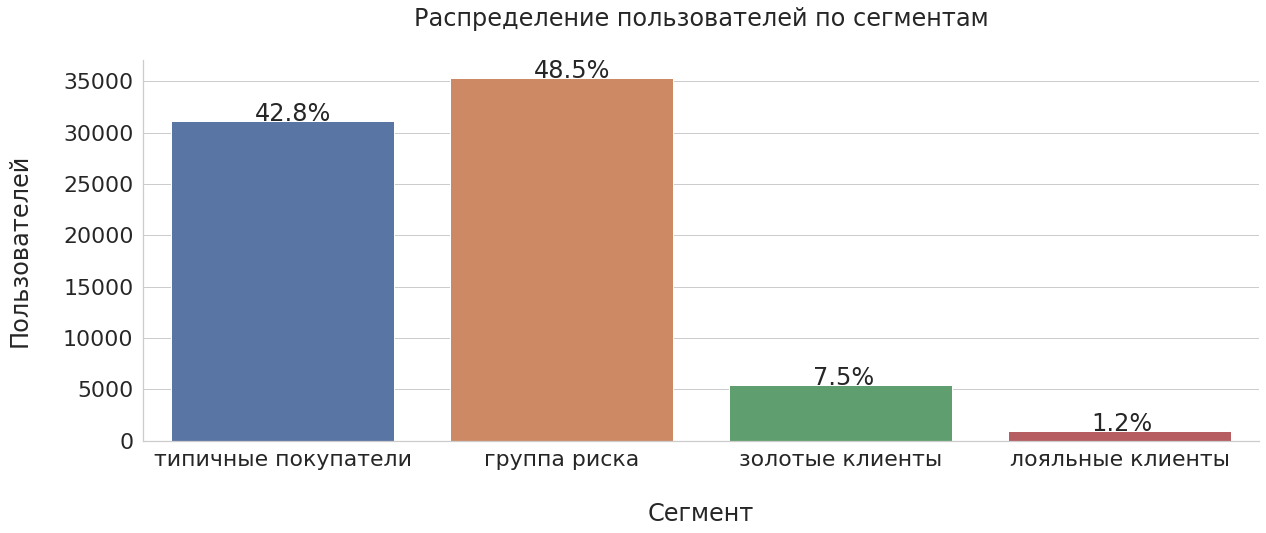

In [237]:
ax = sns.countplot(x='segment', data=rfm)

total = len(rfm['segment'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

ax.set_title('Распределение пользователей по сегментам\n')
ax.set_xlabel("\nСегмент")
ax.set_ylabel("Пользователей\n")
sns.despine()

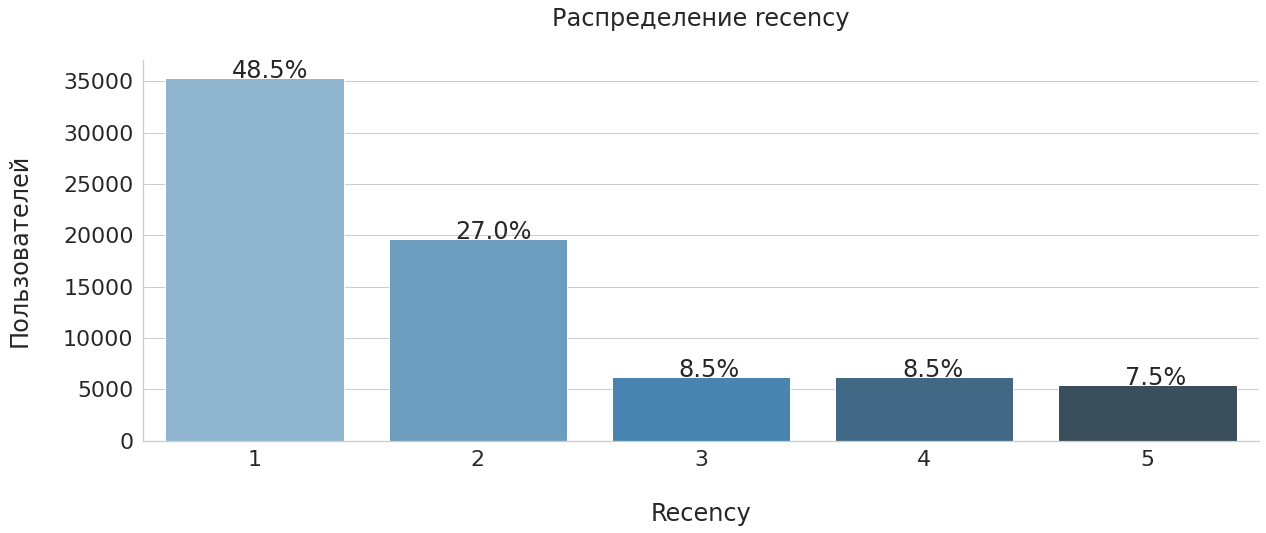

In [245]:
ax = sns.countplot(x='R', data=rfm, palette="Blues_d")

total = len(rfm['R'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
        
ax.set_title('Распределение recency\n')
ax.set_xlabel("\nRecency")
ax.set_ylabel("Пользователей\n")
sns.despine()

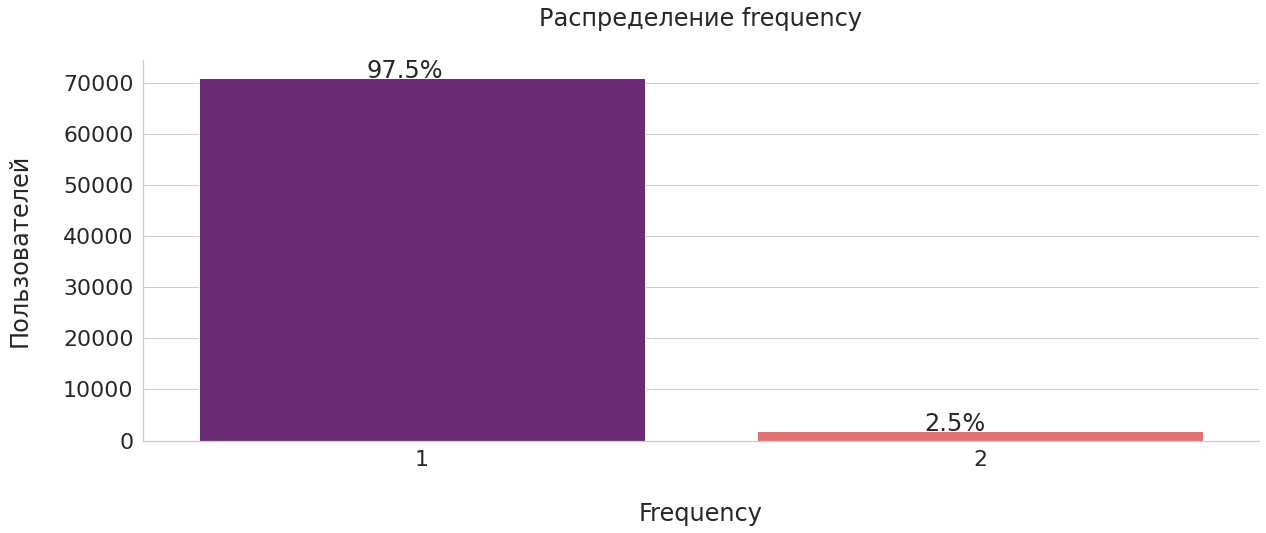

In [247]:
ax = sns.countplot(x='F', data=rfm, palette="magma")

total = len(rfm['F'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() - 0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))
        
ax.set_title('Распределение frequency\n')
ax.set_xlabel("\nFrequency")
ax.set_ylabel("Пользователей\n")
sns.despine()

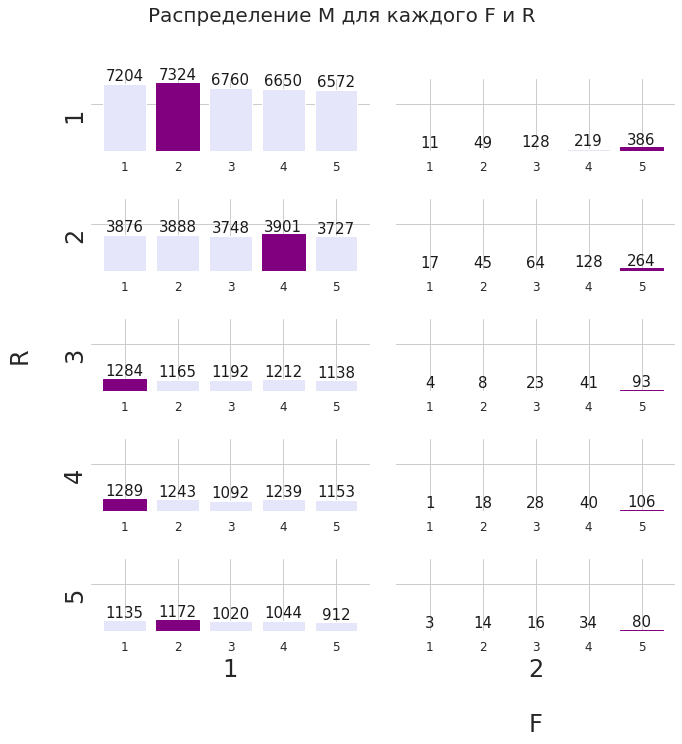

In [278]:
fig, axes = plt.subplots(nrows=5, ncols=2,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

fig.suptitle('Распределение M для каждого F и R',
             fontsize=20,
             y=1.05)

r_range = range(1, 6)
f_range = range(1, 3)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='lavender')
        if r == 5:
            if f == 2:
                ax.set_xlabel('{}\n\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=12)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('purple')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k',
                    fontsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# Выводы, исходя из финальной визуализации наших данных:

# Почти половина (48.5%) пользователей находится в группе риска, то есть покупали у нас более полугода назад.
# Чтобы это исправить, можно персонально для них устроить какую-либо акцию или сделать скидку на следующую покупку.
# 75.5% пользователей сделали покупку в нашем магазине уже более 3 месяцев назад (R = 1-2).
# 24.5% пользователей сделали покупку в нашем магазине за последние 3 месяца (R = 3-5).
# Распределение frequency показывает, что 97.5% покупателей сделали лишь одну покупку у нас (F = 1).
# Такое распределение говорит о том, что в нашем магазине продаются товары, приобритаемые лишь один раз за долгий промежуток
# времени (как минимум раз в год).
# Распределение monetary в сегментах с F = 1 напоминает равномерное, нет разницы в долях, кто сколько потратил (monetary).
# А вот в сегментах с F = 2 распределение monetary больше "сдвинуто" вправо во всех случаях R.
# Это говорит о том, что если человек делает покупку два и более раз в нашем магазине, то, скорее всего, он тратит очень
# много денег (monetary > 180, то есть принадлежит сегменту M = 5).